# Pilot Data Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import glob
from matplotlib import animation, rc
from IPython.display import HTML
from jenks import jenks

from util import show_playable_audio, playable_audio

# Loading data files

In [2]:
root = "study_v2.23_data/"
data_directory = os.path.join(root, "pilot_responses")
samples_directory = os.path.join(root, "samples")

csv_files = glob.glob(os.path.join(data_directory, "*.csv"))

samples_to_responses = {}
samples = []
for csv_file in csv_files:
    subject = os.path.split(csv_file)[-1]
    reader = csv.reader(open(csv_file, 'r'))
    for line in reader:
        data = line[1][:-1]
        split_data = data.split(" ")
        sample_name = split_data[1]
        sample_path = os.path.join(samples_directory, sample_name)
        sample = {'name': sample_name, 'path:': sample_path}
        responses = [float(t) for t in split_data[3:]]
        if sample_name not in samples_to_responses:
            samples_to_responses[sample_name] = {'length': float(split_data[2]), 'path': sample_path, 'subjects': {}}
            samples.append(sample_name)
        
        if subject not in samples_to_responses[sample_name]['subjects']:
            samples_to_responses[sample_name]['subjects'][subject] = {'responses': []}
            
        samples_to_responses[sample_name]['subjects'][subject]['responses'].append(responses)
        

In [3]:
print(samples)

['09_AcousticGtr2.mp3', '08_AcousticGtr1_2.mp3', '18_Guitalele.mp3', '04_AcousticGtrCloseMics.mp3', '19_AcousticGtr.mp3']


# Visualizing Responses

In [4]:
def animate_sample_responses(test_sample):
    sample_data = samples_to_responses[test_sample]
    subjects = sample_data['subjects']
    length = int(sample_data['length'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlim((0, length))
    ax.set_ylim((-1, 5))
    ax.set_title(test_sample)
    ax.set_xlabel("milliseconds")
    c = ['r', 'b', 'g', 'k', 'y', 'o']
    
    max_y = len(subjects) * 3.1
    cursor, = ax.plot([], [], lw=2)
   
    def init():
        
        ax.set_ylim((-1, max_y))
        for subject_idx, (subject, subject_responses) in enumerate(subjects.items()):
            for response_idx, response in enumerate(subject_responses['responses']):
                ys = np.ones(len(response)) * 3 * subject_idx + response_idx * 0.25
                
                ax.scatter(response, ys, label=subject, s=100, c=c[subject_idx])
        ax.legend(bbox_to_anchor=(1, 1))
        cursor.set_data([0, 0], [-1, max_y])
        return (cursor,)
    
    scale = 100
    def animate(i):
        x = [i * scale, i * scale]
        y = [-1, max_y]
        cursor.set_data(x, y)
        return (cursor,)
    
    
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=length//scale, interval=100, blit=True)
    return anim.to_html5_video()

In [5]:
def samples_and_labels(test_sample, group_labels):
    sample_data = samples_to_responses[test_sample]
    subjects = sample_data['subjects']
    length = int(sample_data['length'])
    c = ['r', 'b', 'g', 'k', 'y', 'o']
    plt.figure(figsize=(15,6))
    plt.xlim((0, length))
    plt.ylim((-0.5, 4.5))
    plt.title(test_sample)
    plt.xlabel("milliseconds")
    for subject_idx, (subject, subject_responses) in enumerate(subjects.items()):
        for response_idx, response in enumerate(subject_responses['responses']):
            ys = np.ones(len(response)) * 1.5 * subject_idx + response_idx * 0.25

            plt.scatter(response, ys, label=subject, s=100, c=c[subject_idx])
    for t in group_labels:
        plt.plot([t, t], [-1, 7], c='k')
#     plt.legend(bbox_to_anchor=(1, 1))
    plt.show()
    
def show_labels_and_audio(i, labels):
    samples_and_labels(samples[i], labels)
    show_playable_audio(samples_to_responses[samples[i]]['path'])

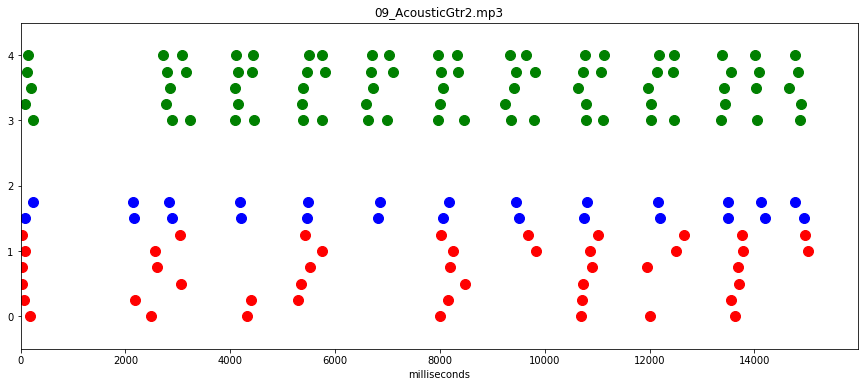

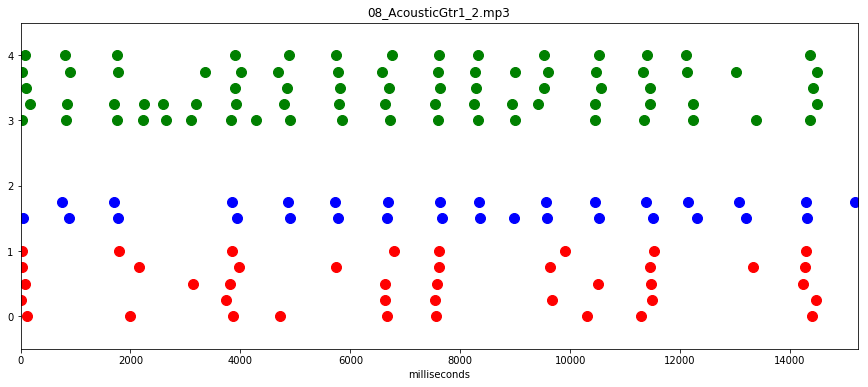

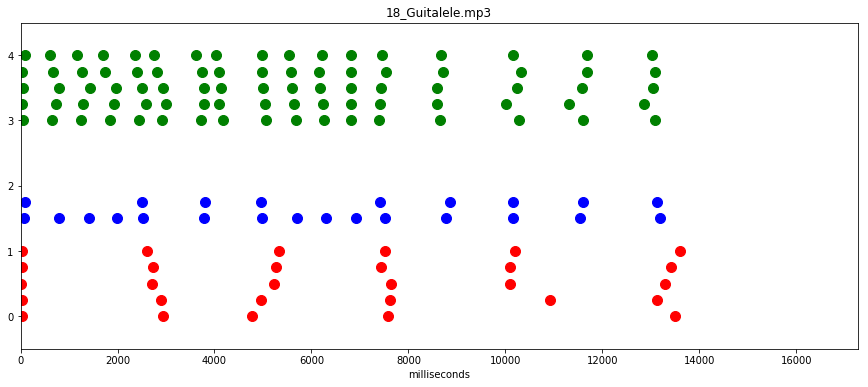

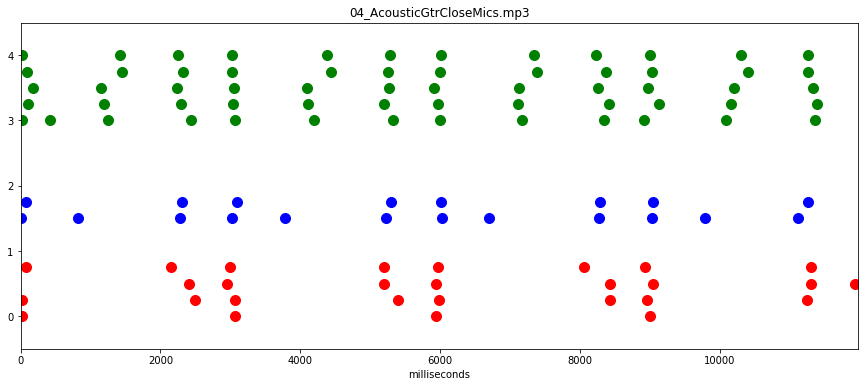

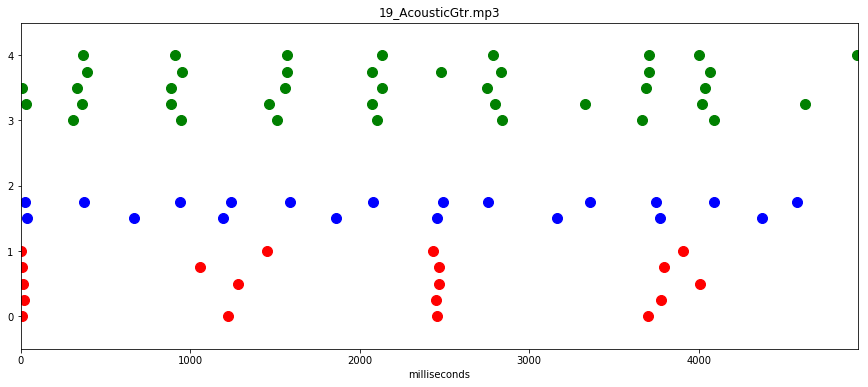

In [6]:
for i in range(5):
    show_labels_and_audio(i, [])

## agreement of groupings by song

In [7]:
def agreement(people_how_responded_counts, people_how_responded):
    fig, ax = plt.subplots(1,2)
    ax[0].hist(people_how_responded_counts)
    ax[1].hist(people_how_responded)
    plt.show()
    return np.count_nonzero(people_how_responded - 1) / people_how_responded.shape[0]

09_AcousticGtr2.mp3
MEAN: 6.90476190476 STDEV: 3.43517881845


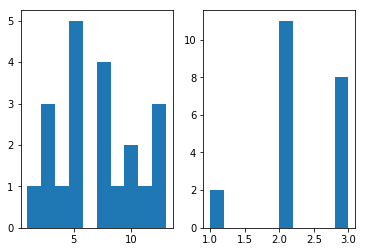

having two responses would identify 90.48% of groups


In [8]:
print("09_AcousticGtr2.mp3")
people_how_responded_counts = np.array([13, 3, 10, 5, 7, 5, 1, 4, 7, 3, 11, 5, 7, 5, 13, 3, 9, 5, 7, 12, 10])
people_how_responded = np.array([3,2,3,2,2,2,3,2,2,1,3,2,2,2,3,1,3,2,2,3,3])
assert(len(people_how_responded_counts) == len(people_how_responded))
print("MEAN:", np.mean(people_how_responded_counts), "STDEV:", np.std(people_how_responded_counts))
a = agreement(people_how_responded_counts, people_how_responded)
print("having two responses would identify {:0.2f}% of groups".format(a*100))

08_AcousticGtr1_2.mp3
MEAN: 7.55 STDEV: 3.45651558654


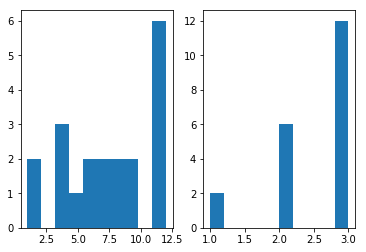

having two responses would identify 90.00% of groups


In [9]:
print("08_AcousticGtr1_2.mp3")
people_how_responded_counts = np.array([12,6,7,4,2,4,12,1,8,8,11,12,7,4,9,9,12,6,5,12])
people_how_responded = np.array([3,2,3,2,1,2,3,1,3,3,3,3,2,2,3,3,3,2,3,3])
assert(len(people_how_responded) == len(people_how_responded_counts))
print("MEAN:", np.mean(people_how_responded_counts), "STDEV:", np.std(people_how_responded_counts))
a = agreement(people_how_responded_counts, people_how_responded)
print("having two responses would identify {:0.2f}% of groups".format(a*100))

04_AcousticGtrCloseMics.mp3
MEAN: 7.3125 STDEV: 4.55135625391


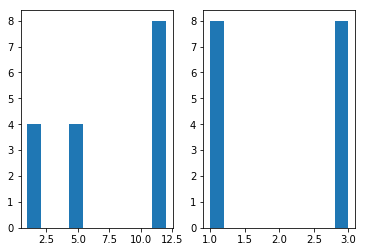

having two responses would identify 50.00% of groups


In [10]:
print("04_AcousticGtrCloseMics.mp3")
people_how_responded_counts = np.array([12,1,5,11,12,1,5,11,12,1,5,11,12,1,5,12])
people_how_responded = np.array([3,1,1,3,3,1,1,3,3,1,1,3,3,1,1,3])
assert(len(people_how_responded) == len(people_how_responded_counts))
print("MEAN:", np.mean(people_how_responded_counts), "STDEV:", np.std(people_how_responded_counts))
a = agreement(people_how_responded_counts, people_how_responded)
print("having two responses would identify {:0.2f}% of groups".format(a*100))

18_Guitalele.mp3
MEAN: 8.05882352941 STDEV: 2.53146291663


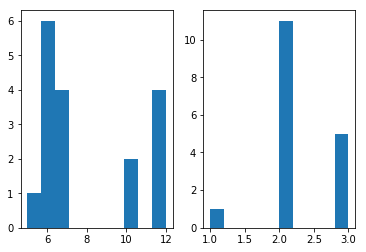

having two responses would identify 94.12% of groups


In [11]:
print("18_Guitalele.mp3")
people_how_responded_counts = np.array([12,6,6,6,7,10,7,5,12,6,6,6,12,7,10,7,12])
people_how_responded = np.array([3,2,2,2,2,2,2,1,3,2,2,2,3,2,3,2,3])
assert(len(people_how_responded) == len(people_how_responded_counts))
print("MEAN:", np.mean(people_how_responded_counts), "STDEV:", np.std(people_how_responded_counts))
a = agreement(people_how_responded_counts, people_how_responded)
print("having two responses would identify {:0.2f}% of groups".format(a*100))

19_AcousticGtr.mp3
MEAN: 4.8125 STDEV: 3.00455383543


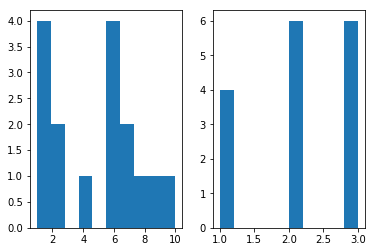

having two responses would identify 75.00% of groups


In [12]:
print("19_AcousticGtr.mp3")
people_how_responded_counts = np.array([10,6,1,7,4,7,1,6,6,6,1,2,9,8,1,2])
people_how_responded = np.array([3,2,1,3,2,3,1,2,3,2,1,2,3,3,1,2])
assert(len(people_how_responded) == len(people_how_responded_counts))
print("MEAN:", np.mean(people_how_responded_counts), "STDEV:", np.std(people_how_responded_counts))
a = agreement(people_how_responded_counts, people_how_responded)
print("having two responses would identify {:0.2f}% of groups".format(a*100))